Using device: cuda
Found 5 classes: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
Dataset split: 2563 train, 549 validation, 550 test images.
Epoch 1/25
----------


Training: 100%|██████████| 81/81 [01:11<00:00,  1.13it/s, loss=2.0135]


Train Loss: 0.7021 | Val Loss: 0.5385 | Val Acc: 0.7869
Validation loss improved. Saving model.
Epoch 2/25
----------


Training: 100%|██████████| 81/81 [01:49<00:00,  1.35s/it, loss=0.7222] 


Train Loss: 0.4905 | Val Loss: 0.4792 | Val Acc: 0.8342
Validation loss improved. Saving model.
Epoch 3/25
----------


Training: 100%|██████████| 81/81 [01:38<00:00,  1.21s/it, loss=0.2384] 


Train Loss: 0.4394 | Val Loss: 0.4576 | Val Acc: 0.8197
Validation loss improved. Saving model.
Epoch 4/25
----------


Training: 100%|██████████| 81/81 [01:35<00:00,  1.18s/it, loss=0.7027] 


Train Loss: 0.3665 | Val Loss: 0.4810 | Val Acc: 0.8270
No improvement in validation loss for 1 epoch(s).
Epoch 5/25
----------


Training: 100%|██████████| 81/81 [01:36<00:00,  1.20s/it, loss=0.1335] 


Train Loss: 0.3324 | Val Loss: 0.4748 | Val Acc: 0.8215
No improvement in validation loss for 2 epoch(s).
Epoch 6/25
----------


Training: 100%|██████████| 81/81 [01:31<00:00,  1.13s/it, loss=0.1242] 


Train Loss: 0.2884 | Val Loss: 0.6152 | Val Acc: 0.7996
No improvement in validation loss for 3 epoch(s).
Epoch 7/25
----------


Training: 100%|██████████| 81/81 [11:04<00:00,  8.21s/it, loss=0.1323] 


Train Loss: 0.2450 | Val Loss: 0.6324 | Val Acc: 0.7814
No improvement in validation loss for 4 epoch(s).
Epoch 8/25
----------


Training: 100%|██████████| 81/81 [01:34<00:00,  1.17s/it, loss=1.4661] 


Train Loss: 0.2148 | Val Loss: 0.6642 | Val Acc: 0.7887
No improvement in validation loss for 5 epoch(s).
Epoch 9/25
----------


Training: 100%|██████████| 81/81 [01:11<00:00,  1.14it/s, loss=2.4968]


Train Loss: 0.2359 | Val Loss: 0.5495 | Val Acc: 0.8015
No improvement in validation loss for 6 epoch(s).
Epoch 10/25
----------


Training: 100%|██████████| 81/81 [00:41<00:00,  1.96it/s, loss=2.0573]


Train Loss: 0.1981 | Val Loss: 0.6243 | Val Acc: 0.8270
No improvement in validation loss for 7 epoch(s).
Early stopping triggered.
Training finished.


C:\Users\Sahil\AppData\Local\Temp\ipykernel_2188\3480279616.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet50_model.pth')


--- Final Evaluation on Test Set ---


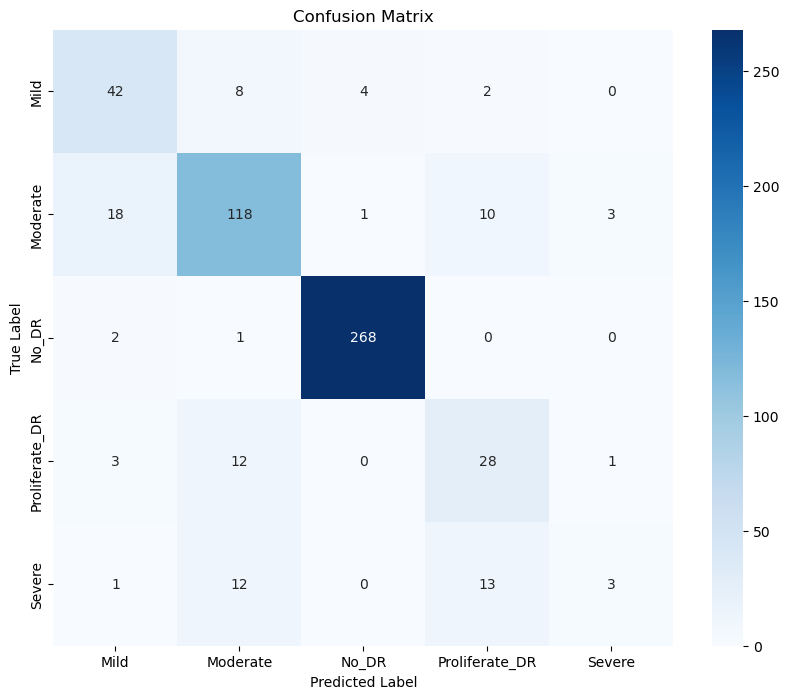


Test Loss: 0.4202
Test Accuracy: 0.8345

Final Test Classification Report (including macro averages):
                precision    recall  f1-score   support

          Mild     0.6364    0.7500    0.6885        56
      Moderate     0.7815    0.7867    0.7841       150
         No_DR     0.9817    0.9889    0.9853       271
Proliferate_DR     0.5283    0.6364    0.5773        44
        Severe     0.4286    0.1034    0.1667        29

      accuracy                         0.8345       550
     macro avg     0.6713    0.6531    0.6404       550
  weighted avg     0.8265    0.8345    0.8244       550


--- Generating Grad-CAM Visualizations ---


C:\Users\Sahil\AppData\Local\Temp\ipykernel_2188\3480279616.py:211: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  heatmap = np.maximum(heatmap.cpu(), 0)


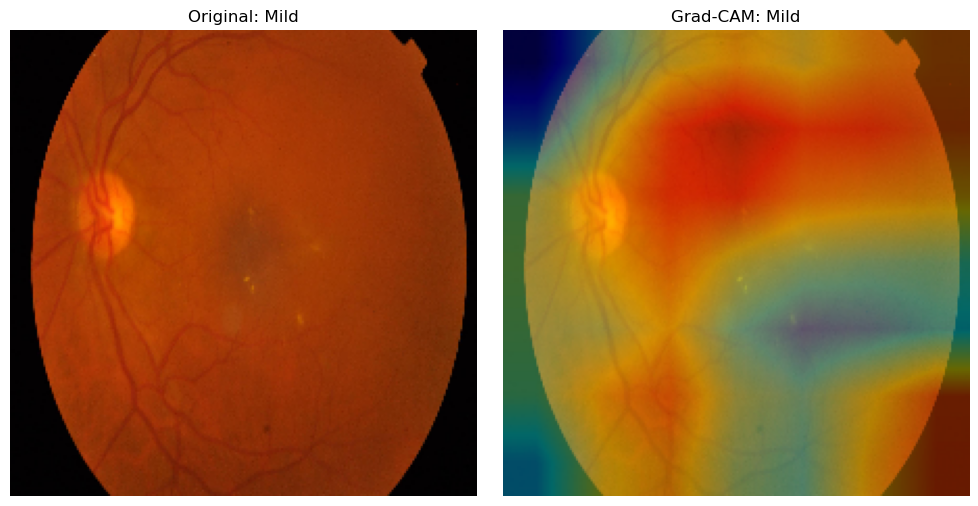

Saved Grad-CAM for Mild to Resnet50\cam_Mild.png


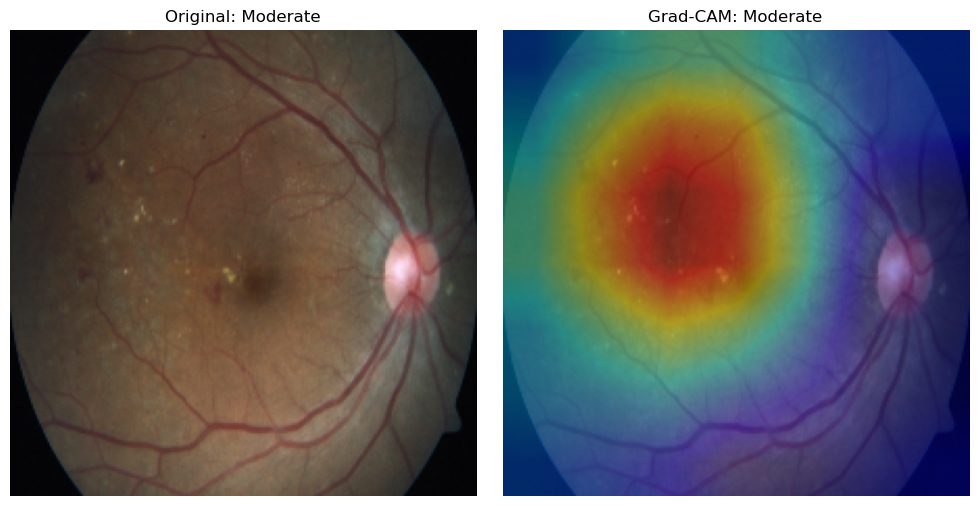

Saved Grad-CAM for Moderate to Resnet50\cam_Moderate.png


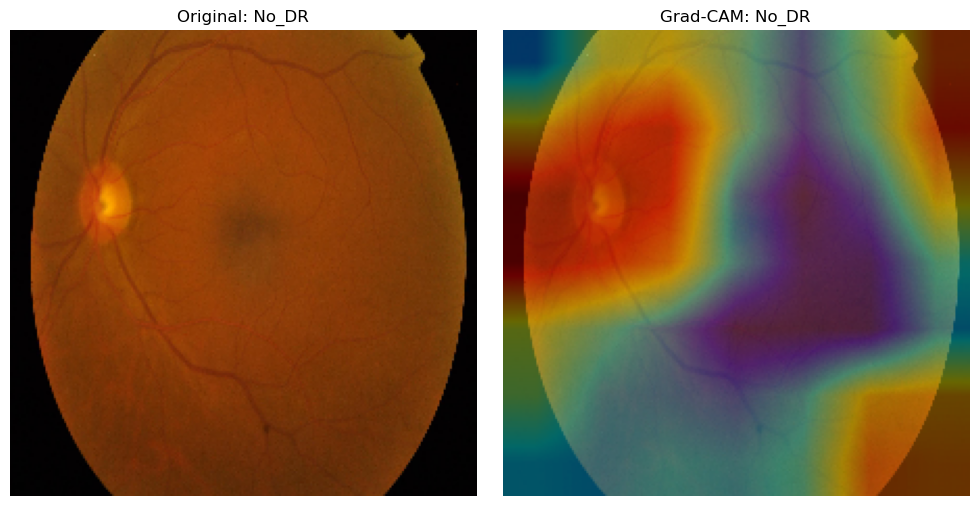

Saved Grad-CAM for No_DR to Resnet50\cam_No_DR.png


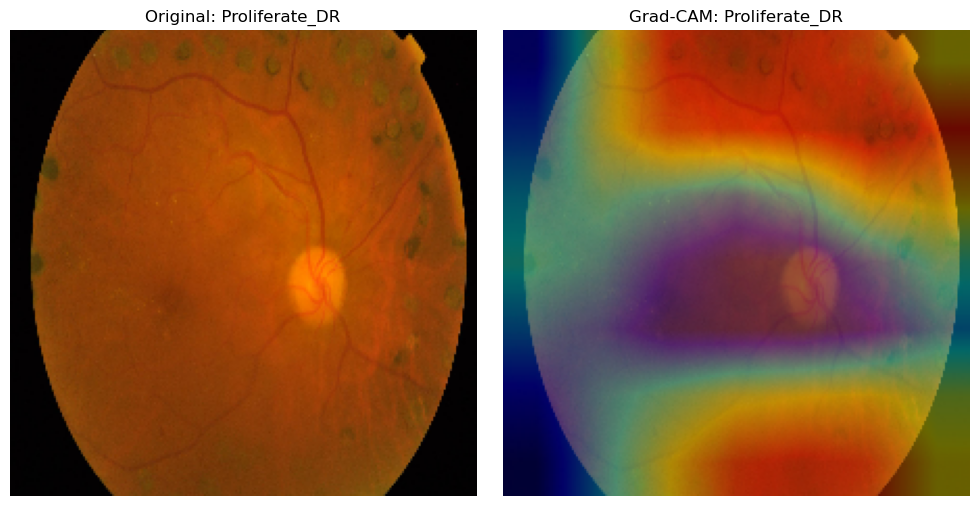

Saved Grad-CAM for Proliferate_DR to Resnet50\cam_Proliferate_DR.png


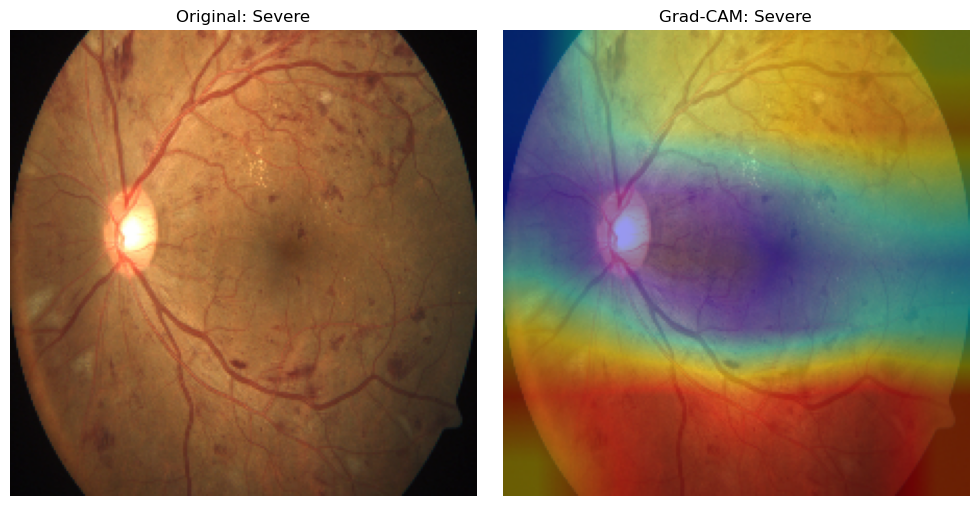

Saved Grad-CAM for Severe to Resnet50\cam_Severe.png


In [5]:
# 1. Necessary Imports
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

# 2. Setup and Configuration
def setup():
    """Initializes device, paths, and class names."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    base_dir = 'colored_images'
    # Ensure the directory exists and get class names
    if not os.path.isdir(base_dir):
        raise FileNotFoundError(f"The directory '{base_dir}' was not found. Please ensure it exists in your project folder.")
        
    class_names = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
    num_classes = len(class_names)
    print(f"Found {num_classes} classes: {class_names}")

    return device, base_dir, class_names, num_classes

# 3. Data Loading and Preprocessing
def get_dataloaders(base_dir, class_names):
    """Creates stratified data loaders for train, validation, and test sets."""
    # Define transformations
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    # Load the full dataset
    full_dataset = datasets.ImageFolder(base_dir)
    targets = full_dataset.targets
    
    # Stratified split for 70% train and 30% temp (val + test)
    sss_train_valtest = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)
    train_indices, val_test_indices = next(sss_train_valtest.split(np.zeros(len(targets)), targets))

    # Stratified split for 15% val and 15% test from the 30% temp set
    val_test_targets = np.array(targets)[val_test_indices]
    sss_val_test = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=42)
    val_sub_indices, test_sub_indices = next(sss_val_test.split(np.zeros(len(val_test_targets)), val_test_targets))

    val_indices = val_test_indices[val_sub_indices]
    test_indices = val_test_indices[test_sub_indices]

    # Create datasets for train, validation, and test
    train_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms['train']), train_indices)
    val_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms['val']), val_indices)
    test_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms['val']), test_indices)

    print(f"Dataset split: {len(train_dataset)} train, {len(val_dataset)} validation, {len(test_dataset)} test images.")

    # Create dataloaders
    dataloaders = {
        'train': DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True),
        'val': DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True),
        'test': DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
    }
    
    return dataloaders

# 4. Model Training and Evaluation
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs, class_names):
    """Trains the model with early stopping and progress logging."""
    best_val_loss = float('inf')
    epochs_no_improve = 0
    patience = 7

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        
        progress_bar = tqdm(dataloaders['train'], desc="Training")
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})
        
        epoch_loss = running_loss / len(dataloaders['train'].dataset)
        
        # Validation phase
        val_loss, val_acc, _ = evaluate_model(model, dataloaders['val'], criterion, device, class_names)
        
        # **MODIFICATION**: Only print summary stats for the epoch
        print(f'Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')

        # Early stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_resnet50_model.pth')
            print("Validation loss improved. Saving model.")
        else:
            epochs_no_improve += 1
            print(f"No improvement in validation loss for {epochs_no_improve} epoch(s).")

        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break
            
    print("Training finished.")
    # Load best model weights for final testing
    model.load_state_dict(torch.load('best_resnet50_model.pth'))
    return model

def evaluate_model(model, dataloader, criterion, device, class_names, is_test=False):
    """Evaluates the model and returns metrics. Optionally plots confusion matrix for test set."""
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = np.mean(np.array(all_labels) == np.array(all_preds))
    
    report_dict = {
        'true_labels': all_labels,
        'pred_labels': all_preds
    }
    
    if is_test:
        cm = confusion_matrix(all_labels, all_preds)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    return epoch_loss, epoch_acc, report_dict

# 5. Grad-CAM Implementation
class GradCAM:
    """Class for generating Grad-CAM visualizations."""
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_full_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def __call__(self, x, class_idx=None):
        self.model.eval()
        output = self.model(x)
        
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()

        one_hot = torch.zeros_like(output)
        one_hot[0][class_idx] = 1
        
        self.model.zero_grad()
        output.backward(gradient=one_hot, retain_graph=True)
        
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        for i in range(self.activations.shape[1]):
            self.activations[:, i, :, :] *= pooled_gradients[i]
            
        heatmap = torch.mean(self.activations, dim=1).squeeze()
        heatmap = np.maximum(heatmap.cpu(), 0)
        heatmap /= torch.max(heatmap)
        return heatmap.numpy()

def visualize_cam(model, device, base_dir, class_names):
    """Generates and saves Grad-CAM for one random image per class."""
    output_dir = 'Resnet50'
    os.makedirs(output_dir, exist_ok=True)
    
    target_layer = model.layer4[-1]
    grad_cam = GradCAM(model, target_layer)
    
    vis_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        img_name = random.choice(os.listdir(class_dir))
        img_path = os.path.join(class_dir, img_name)
        
        img = Image.open(img_path).convert('RGB')
        input_tensor = vis_transform(img).unsqueeze(0).to(device)
        
        heatmap = grad_cam(input_tensor)
        
        img_cv = cv2.imread(img_path)
        img_cv = cv2.resize(img_cv, (224, 224))
        heatmap_resized = cv2.resize(heatmap, (224, 224))
        heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(img_cv, 0.6, heatmap_color, 0.4, 0)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
        ax1.set_title(f'Original: {class_name}')
        ax1.axis('off')
        
        ax2.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        ax2.set_title(f'Grad-CAM: {class_name}')
        ax2.axis('off')
        
        plt.tight_layout()
        save_path = os.path.join(output_dir, f'cam_{class_name}.png')
        plt.savefig(save_path)
        plt.show()
        print(f"Saved Grad-CAM for {class_name} to {save_path}")

# 6. Main Execution Block
if __name__ == '__main__':
    # Initial setup
    device, base_dir, class_names, num_classes = setup()
    
    # Get dataloaders
    dataloaders = get_dataloaders(base_dir, class_names)
    
    # Initialize model, loss, and optimizer
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
    # Train the model
    trained_model = train_model(model, dataloaders, criterion, optimizer, device, num_epochs=25, class_names=class_names)
    
    # Final evaluation on the test set
    print("\n--- Final Evaluation on Test Set ---")
    test_loss, test_acc, test_report_dict = evaluate_model(trained_model, dataloaders['test'], criterion, device, class_names, is_test=True)
    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("\nFinal Test Classification Report (including macro averages):")
    print(classification_report(test_report_dict['true_labels'], test_report_dict['pred_labels'], target_names=class_names, digits=4))
    
    # Generate and save Grad-CAM visualizations
    print("\n--- Generating Grad-CAM Visualizations ---")
    visualize_cam(trained_model, device, base_dir, class_names)


Using device: cuda
Found 5 classes: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
Original training set class distribution: Counter({2: 1263, 1: 699, 0: 259, 3: 207, 4: 135})
WeightedRandomSampler enabled for training to handle class imbalance.
Dataset split: 2563 train, 549 validation, 550 test images.
Epoch 1/25
----------


Training: 100%|██████████| 81/81 [01:44<00:00,  1.29s/it, loss=0.7026] 


Train Loss: 0.8964 | Val Loss: 0.6192 | Val Acc: 0.7559
Validation loss improved. Saving model.
Epoch 2/25
----------


Training: 100%|██████████| 81/81 [01:29<00:00,  1.10s/it, loss=0.5653] 


Train Loss: 0.5545 | Val Loss: 0.4979 | Val Acc: 0.8106
Validation loss improved. Saving model.
Epoch 3/25
----------


Training: 100%|██████████| 81/81 [01:27<00:00,  1.08s/it, loss=1.2254] 


Train Loss: 0.3925 | Val Loss: 0.5778 | Val Acc: 0.7960
No improvement in validation loss for 1 epoch(s).
Epoch 4/25
----------


Training: 100%|██████████| 81/81 [01:02<00:00,  1.29it/s, loss=2.3224]


Train Loss: 0.3450 | Val Loss: 0.5657 | Val Acc: 0.8124
No improvement in validation loss for 2 epoch(s).
Epoch 5/25
----------


Training: 100%|██████████| 81/81 [01:53<00:00,  1.40s/it, loss=0.1693] 


Train Loss: 0.2903 | Val Loss: 0.6357 | Val Acc: 0.8124
No improvement in validation loss for 3 epoch(s).
Epoch 6/25
----------


Training: 100%|██████████| 81/81 [01:04<00:00,  1.26it/s, loss=0.0426]


Train Loss: 0.2172 | Val Loss: 0.6534 | Val Acc: 0.8087
No improvement in validation loss for 4 epoch(s).
Epoch 7/25
----------


Training: 100%|██████████| 81/81 [01:39<00:00,  1.23s/it, loss=1.3957] 


Train Loss: 0.2146 | Val Loss: 0.7109 | Val Acc: 0.7996
No improvement in validation loss for 5 epoch(s).
Epoch 8/25
----------


Training: 100%|██████████| 81/81 [01:57<00:00,  1.45s/it, loss=1.9778] 


Train Loss: 0.1654 | Val Loss: 0.7320 | Val Acc: 0.8124
No improvement in validation loss for 6 epoch(s).
Epoch 9/25
----------


Training: 100%|██████████| 81/81 [01:41<00:00,  1.26s/it, loss=0.7097] 


Train Loss: 0.2069 | Val Loss: 0.6669 | Val Acc: 0.8106
No improvement in validation loss for 7 epoch(s).
Early stopping triggered.
Training finished.


C:\Users\Sahil\AppData\Local\Temp\ipykernel_2188\3159877062.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet50_model.pth')


--- Final Evaluation on Test Set ---


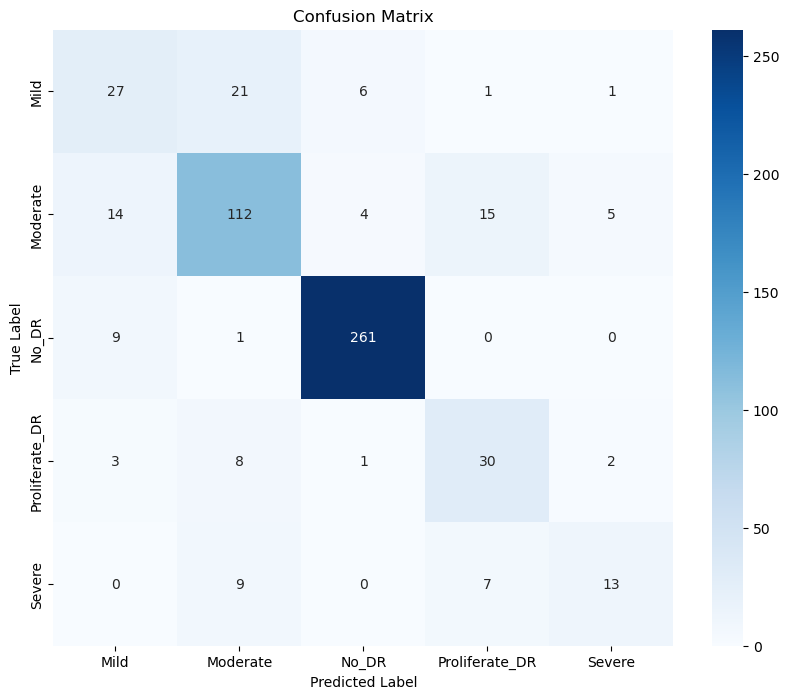


Test Loss: 0.4994
Test Accuracy: 0.8055

Final Test Classification Report (including macro averages):
                precision    recall  f1-score   support

          Mild     0.5094    0.4821    0.4954        56
      Moderate     0.7417    0.7467    0.7442       150
         No_DR     0.9596    0.9631    0.9613       271
Proliferate_DR     0.5660    0.6818    0.6186        44
        Severe     0.6190    0.4483    0.5200        29

      accuracy                         0.8055       550
     macro avg     0.6792    0.6644    0.6679       550
  weighted avg     0.8049    0.8055    0.8040       550


--- Generating Grad-CAM Visualizations ---


C:\Users\Sahil\AppData\Local\Temp\ipykernel_2188\3159877062.py:199: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  heatmap = torch.mean(self.activations, dim=1).squeeze(); heatmap = np.maximum(heatmap.cpu(), 0)


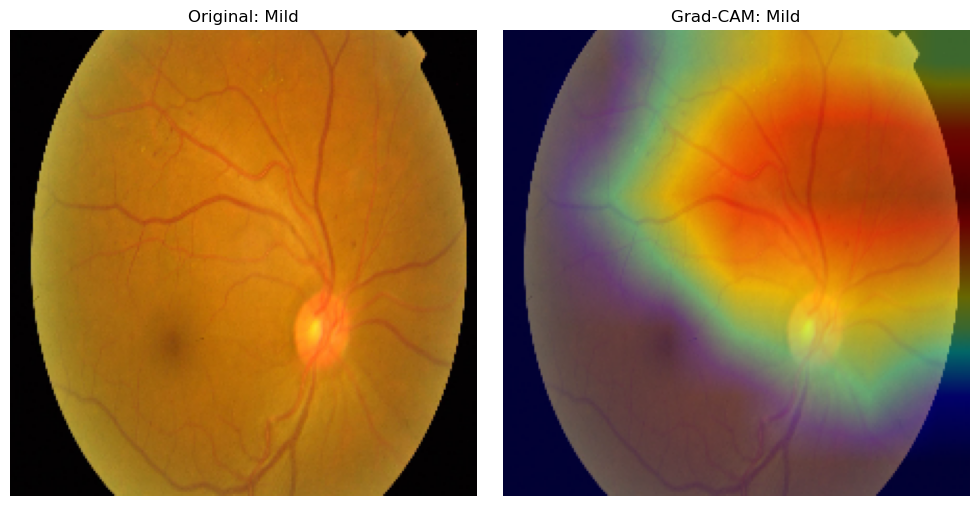

Saved Grad-CAM for Mild to Resnet50_balanced\cam_Mild.png


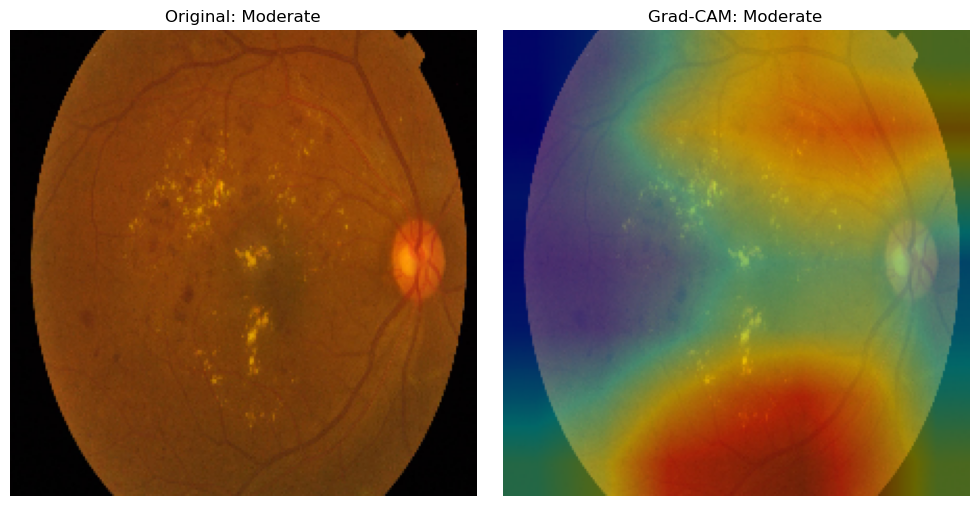

Saved Grad-CAM for Moderate to Resnet50_balanced\cam_Moderate.png


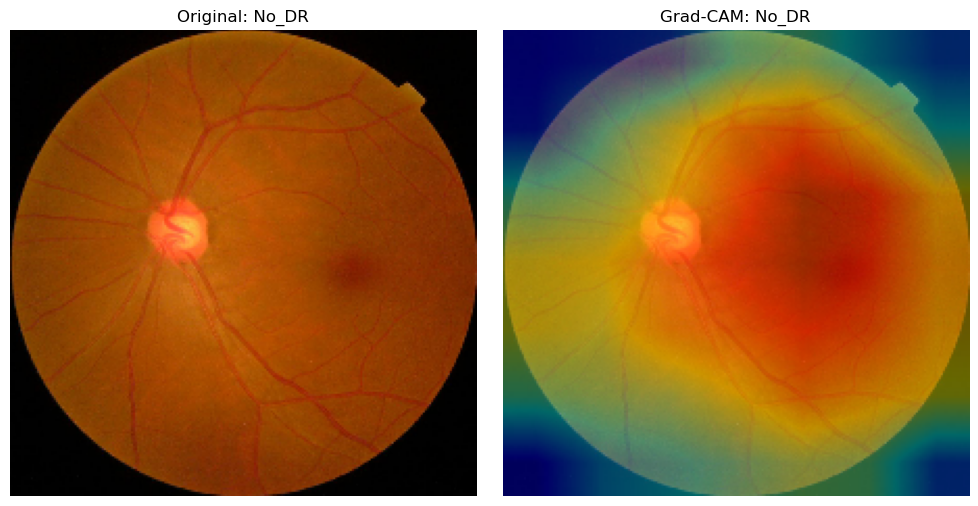

Saved Grad-CAM for No_DR to Resnet50_balanced\cam_No_DR.png


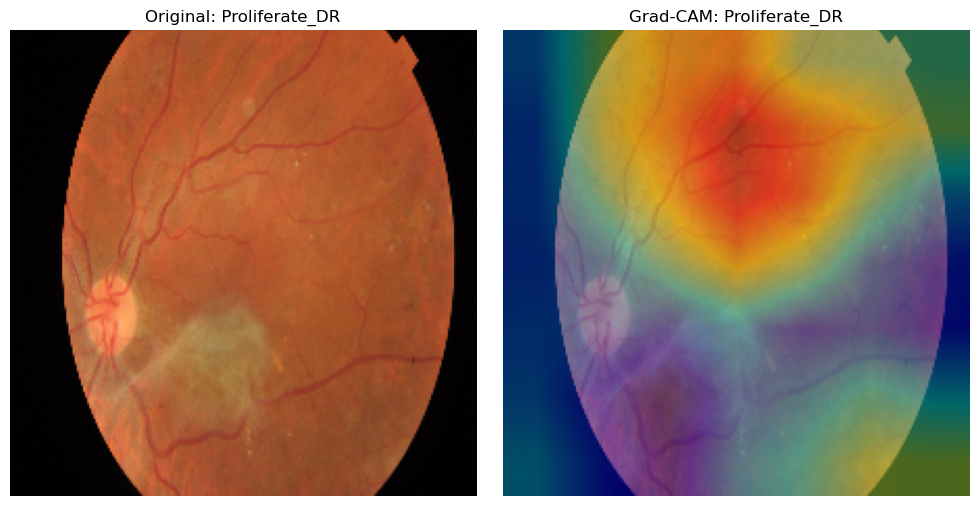

Saved Grad-CAM for Proliferate_DR to Resnet50_balanced\cam_Proliferate_DR.png


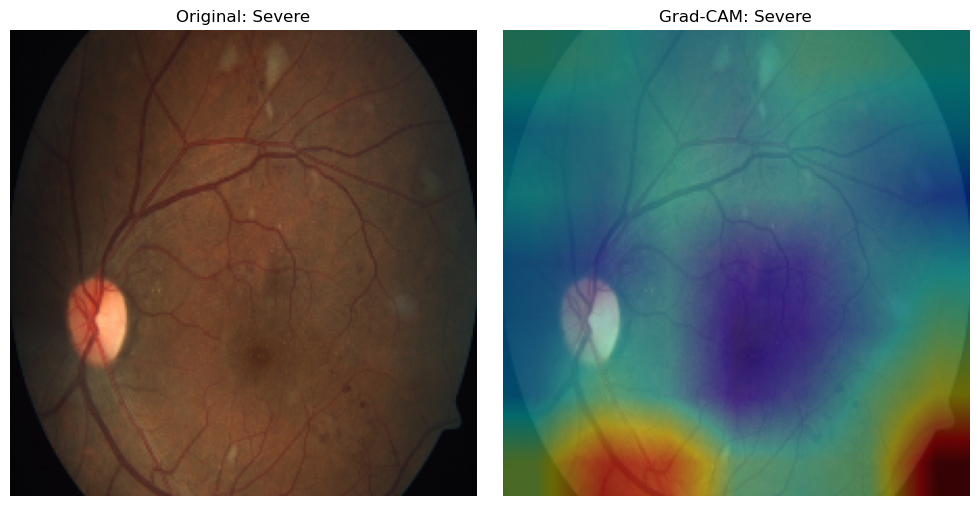

Saved Grad-CAM for Severe to Resnet50_balanced\cam_Severe.png


In [4]:
# 1. Necessary Imports
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter

# 2. Setup and Configuration
def setup():
    """Initializes device, paths, and class names."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    base_dir = 'colored_images'
    if not os.path.isdir(base_dir):
        raise FileNotFoundError(f"The directory '{base_dir}' was not found.")
        
    class_names = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
    num_classes = len(class_names)
    print(f"Found {num_classes} classes: {class_names}")

    return device, base_dir, class_names, num_classes

# 3. Data Loading with Weighted Sampler
def get_dataloaders(base_dir, class_names):
    """Creates stratified data loaders and a weighted sampler for the training set."""
    # Define transformations
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    # Load the full dataset to get targets for splitting
    full_dataset = datasets.ImageFolder(base_dir)
    targets = full_dataset.targets
    
    # Stratified split: 70% train, 30% temp
    sss_train_valtest = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)
    train_indices, val_test_indices = next(sss_train_valtest.split(np.zeros(len(targets)), targets))

    # Stratified split: 15% val, 15% test from temp
    val_test_targets = np.array(targets)[val_test_indices]
    sss_val_test = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=42)
    val_sub_indices, test_sub_indices = next(sss_val_test.split(np.zeros(len(val_test_targets)), val_test_targets))

    val_indices = val_test_indices[val_sub_indices]
    test_indices = val_test_indices[test_sub_indices]

    # Create datasets
    train_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms['train']), train_indices)
    val_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms['val']), val_indices)
    test_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms['val']), test_indices)

    # **MODIFICATION**: Implement WeightedRandomSampler for the training set
    train_targets = [targets[i] for i in train_indices]
    class_counts = Counter(train_targets)
    print(f"Original training set class distribution: {class_counts}")

    # Calculate weights for each sample
    class_weights = 1. / torch.tensor([class_counts[i] for i in range(len(class_names))], dtype=torch.float)
    sample_weights = [class_weights[t] for t in train_targets]

    # Create the sampler
    sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
    print("WeightedRandomSampler enabled for training to handle class imbalance.")

    # Create dataloaders (note: sampler and shuffle are mutually exclusive)
    dataloaders = {
        'train': DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=4, pin_memory=True),
        'val': DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True),
        'test': DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
    }
    
    print(f"Dataset split: {len(train_dataset)} train, {len(val_dataset)} validation, {len(test_dataset)} test images.")
    return dataloaders

# 4. Model Training and Evaluation (remains the same)
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs, class_names):
    """Trains the model with early stopping and progress logging."""
    best_val_loss = float('inf')
    epochs_no_improve = 0
    patience = 7

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        
        progress_bar = tqdm(dataloaders['train'], desc="Training")
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})
        
        epoch_loss = running_loss / len(dataloaders['train'].dataset)
        
        # Validation phase
        val_loss, val_acc, _ = evaluate_model(model, dataloaders['val'], criterion, device, class_names)
        
        print(f'Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')

        # Early stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_resnet50_model.pth')
            print("Validation loss improved. Saving model.")
        else:
            epochs_no_improve += 1
            print(f"No improvement in validation loss for {epochs_no_improve} epoch(s).")

        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break
            
    print("Training finished.")
    model.load_state_dict(torch.load('best_resnet50_model.pth'))
    return model

def evaluate_model(model, dataloader, criterion, device, class_names, is_test=False):
    """Evaluates the model and returns metrics."""
    model.eval()
    running_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = np.mean(np.array(all_labels) == np.array(all_preds))
    
    report_dict = {'true_labels': all_labels, 'pred_labels': all_preds}
    
    if is_test:
        cm = confusion_matrix(all_labels, all_preds)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    return epoch_loss, epoch_acc, report_dict

# 5. Grad-CAM Implementation (remains the same)
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients, self.activations = None, None
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_full_backward_hook(self.save_gradient)
    def save_activation(self, module, input, output): self.activations = output.detach()
    def save_gradient(self, module, grad_in, grad_out): self.gradients = grad_out[0].detach()
    def __call__(self, x, class_idx=None):
        self.model.eval()
        output = self.model(x)
        if class_idx is None: class_idx = output.argmax(dim=1).item()
        one_hot = torch.zeros_like(output); one_hot[0][class_idx] = 1
        self.model.zero_grad(); output.backward(gradient=one_hot, retain_graph=True)
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        for i in range(self.activations.shape[1]): self.activations[:, i, :, :] *= pooled_gradients[i]
        heatmap = torch.mean(self.activations, dim=1).squeeze(); heatmap = np.maximum(heatmap.cpu(), 0)
        heatmap /= torch.max(heatmap)
        return heatmap.numpy()

def visualize_cam(model, device, base_dir, class_names):
    output_dir = 'Resnet50_balanced'
    os.makedirs(output_dir, exist_ok=True)
    target_layer = model.layer4[-1]; grad_cam = GradCAM(model, target_layer)
    vis_transform = transforms.Compose([
        transforms.Resize((224, 224)), transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        img_name = random.choice(os.listdir(class_dir)); img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path).convert('RGB'); input_tensor = vis_transform(img).unsqueeze(0).to(device)
        heatmap = grad_cam(input_tensor)
        img_cv = cv2.imread(img_path); img_cv = cv2.resize(img_cv, (224, 224))
        heatmap_resized = cv2.resize(heatmap, (224, 224))
        heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(img_cv, 0.6, heatmap_color, 0.4, 0)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)); ax1.set_title(f'Original: {class_name}'); ax1.axis('off')
        ax2.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)); ax2.set_title(f'Grad-CAM: {class_name}'); ax2.axis('off')
        plt.tight_layout(); save_path = os.path.join(output_dir, f'cam_{class_name}.png'); plt.savefig(save_path)
        plt.show(); print(f"Saved Grad-CAM for {class_name} to {save_path}")

# 6. Main Execution Block (remains the same)
if __name__ == '__main__':
    # Setup
    device, base_dir, class_names, num_classes = setup()
    
    # Get dataloaders with weighted sampler
    dataloaders = get_dataloaders(base_dir, class_names)
    
    # Initialize model, loss, and optimizer
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
    # Train model
    trained_model = train_model(model, dataloaders, criterion, optimizer, device, num_epochs=25, class_names=class_names)
    
    # Final evaluation
    print("\n--- Final Evaluation on Test Set ---")
    test_loss, test_acc, test_report_dict = evaluate_model(trained_model, dataloaders['test'], criterion, device, class_names, is_test=True)
    print(f"\nTest Loss: {test_loss:.4f}"); print(f"Test Accuracy: {test_acc:.4f}")
    print("\nFinal Test Classification Report (including macro averages):")
    print(classification_report(test_report_dict['true_labels'], test_report_dict['pred_labels'], target_names=class_names, digits=4))
    
    # Grad-CAM visualization
    print("\n--- Generating Grad-CAM Visualizations ---")
    visualize_cam(trained_model, device, base_dir, class_names)


In [1]:
# ============================================================
# ResNet-50 with Depthwise Kernel Sweep + Early Stopping (Patience=5)
# ============================================================

import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter


# ------------------------------------------------------------
# 1. Setup and Configuration
# ------------------------------------------------------------
def setup():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    base_dir = "colored_images"
    if not os.path.isdir(base_dir):
        raise FileNotFoundError(f"The directory '{base_dir}' was not found.")

    class_names = sorted(
        [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    )
    num_classes = len(class_names)
    print(f"Found {num_classes} classes: {class_names}")
    return device, base_dir, class_names, num_classes


# ------------------------------------------------------------
# 2. Dataset Loading + Balanced Sampling
# ------------------------------------------------------------
def class_balanced_weights_from_labels(labels, num_classes, beta=0.9999):
    counts = np.bincount(labels, minlength=num_classes).astype(np.float64)
    effective_num = 1.0 - np.power(beta, counts)
    effective_num = np.where(effective_num > 0, effective_num, 1.0)
    weights = (1.0 - beta) / effective_num
    weights = weights / weights.mean()
    return torch.tensor(weights, dtype=torch.float32)


def get_dataloaders(base_dir, class_names):
    data_transforms = {
        "train": transforms.Compose(
            [
                transforms.RandomRotation(15),
                transforms.RandomHorizontalFlip(0.5),
                transforms.ColorJitter(0.1, 0.1, 0.1),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225]),
            ]
        ),
        "val": transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225]),
            ]
        ),
    }

    full_dataset = datasets.ImageFolder(base_dir)
    targets = full_dataset.targets

    sss_train_valtest = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    train_idx, valtest_idx = next(sss_train_valtest.split(np.zeros(len(targets)), targets))

    valtest_targets = np.array(targets)[valtest_idx]
    sss_val_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
    val_sub, test_sub = next(sss_val_test.split(np.zeros(len(valtest_targets)), valtest_targets))

    val_idx = valtest_idx[val_sub]
    test_idx = valtest_idx[test_sub]

    train_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms["train"]), train_idx)
    val_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms["val"]), val_idx)
    test_dataset = Subset(datasets.ImageFolder(base_dir, transform=data_transforms["val"]), test_idx)

    print(f"Dataset split: {len(train_dataset)} train, {len(val_dataset)} val, {len(test_dataset)} test")

    train_labels = [full_dataset.targets[i] for i in train_idx]
    cb_weights = class_balanced_weights_from_labels(train_labels, num_classes=len(class_names))
    sample_weights = [cb_weights[label].item() for label in train_labels]
    sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

    pin = torch.cuda.is_available()
    dataloaders = {
        "train": DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=1, pin_memory=pin),
        "val": DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=1, pin_memory=pin),
        "test": DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=1, pin_memory=pin),
        "cb_class_weights": cb_weights,
    }
    return dataloaders


# ------------------------------------------------------------
# 3. Modify ResNet Convs
# ------------------------------------------------------------
def replace_conv_kernels(module, kernel_size):
    for name, child in module.named_children():
        if isinstance(child, nn.Conv2d):
            stride, padding, bias = child.stride, (kernel_size - 1) // 2, child.bias is not None
            new_conv = nn.Conv2d(child.in_channels, child.out_channels, kernel_size=kernel_size,
                                 stride=stride, padding=padding, bias=bias)
            nn.init.kaiming_normal_(new_conv.weight, mode="fan_out", nonlinearity="relu")
            if bias:
                nn.init.zeros_(new_conv.bias)
            setattr(module, name, new_conv)
        else:
            replace_conv_kernels(child, kernel_size)


def build_resnet50(num_classes, kernel_size=3, pretrained=True):
    weights = models.ResNet50_Weights.IMAGENET1K_V1 if pretrained else None
    model = models.resnet50(weights=weights)
    replace_conv_kernels(model.layer1, kernel_size)
    replace_conv_kernels(model.layer2, kernel_size)
    replace_conv_kernels(model.layer3, kernel_size)
    replace_conv_kernels(model.layer4, kernel_size)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model


# ------------------------------------------------------------
# 4. Training + Evaluation
# ------------------------------------------------------------
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs, class_names):
    best_val_loss = float("inf")
    patience, epochs_no_improve = 5, 0

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}\n" + "-" * 10)
        model.train()
        run_loss, run_correct, total = 0.0, 0, 0
        progress = tqdm(dataloaders["train"], desc="Training")

        for inputs, labels in progress:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            run_loss += loss.item() * inputs.size(0)
            run_correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

            if torch.cuda.is_available():
                gpu_mem = torch.cuda.memory_allocated(0) / 1024**2
                progress.set_postfix({"loss": f"{loss.item():.4f}", "GPU_MB": f"{gpu_mem:.1f}"})

        train_loss, train_acc = run_loss / total, run_correct / total
        val_loss, val_acc, _ = evaluate_model(model, dataloaders["val"], criterion, device, class_names)
        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss, epochs_no_improve = val_loss, 0
            torch.save(model.state_dict(), "best_resnet_model.pth")
            print("✅ Validation loss improved — model saved.")
        else:
            epochs_no_improve += 1
            print(f"No improvement for {epochs_no_improve} epoch(s).")
            if epochs_no_improve >= patience:
                print("⏹️ Early stopping triggered.")
                break

    model.load_state_dict(torch.load("best_resnet_model.pth"))
    return model


def evaluate_model(model, dataloader, criterion, device, class_names, is_test=False):
    model.eval()
    run_loss, preds_all, labels_all = 0.0, [], []
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = criterion(out, y)
            run_loss += loss.item() * x.size(0)
            preds_all += out.argmax(1).cpu().numpy().tolist()
            labels_all += y.cpu().numpy().tolist()

    loss_epoch = run_loss / len(dataloader.dataset)
    acc_epoch = np.mean(np.array(preds_all) == np.array(labels_all))

    if is_test:
        cm = confusion_matrix(labels_all, preds_all)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

        print(classification_report(labels_all, preds_all, target_names=class_names, digits=4))
    return loss_epoch, acc_epoch, {"true_labels": labels_all, "pred_labels": preds_all}


# ------------------------------------------------------------
# 5. Grad-CAM Visualization
# ------------------------------------------------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_full_backward_hook(self.save_gradient)

    def save_activation(self, m, i, o):
        self.activations = o.detach()

    def save_gradient(self, m, gi, go):
        self.gradients = go[0].detach()

    def __call__(self, x, class_idx=None):
        self.model.eval()
        out = self.model(x)
        if class_idx is None:
            class_idx = out.argmax(dim=1).item()
        one_hot = torch.zeros_like(out)
        one_hot[0][class_idx] = 1
        self.model.zero_grad()
        out.backward(gradient=one_hot, retain_graph=True)
        pooled_grad = torch.mean(self.gradients, dim=[0, 2, 3])
        activ = self.activations.clone()
        for i in range(activ.shape[1]):
            activ[:, i, :, :] *= pooled_grad[i]
        heat = torch.mean(activ, dim=1).squeeze()
        heat = torch.clamp(heat, min=0)
        heat /= (heat.max() + 1e-8)
        return heat.cpu().numpy()


def visualize_cam(model, device, base_dir, class_names):
    out_dir = "ResNet50_1"
    os.makedirs(out_dir, exist_ok=True)

    target_layer = model.layer4[-1].conv3
    cam = GradCAM(model, target_layer)

    vis_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ])

    for cname in class_names:
        img_name = random.choice(os.listdir(os.path.join(base_dir, cname)))
        img_path = os.path.join(base_dir, cname, img_name)
        img = Image.open(img_path).convert("RGB")
        tensor = vis_transform(img).unsqueeze(0).to(device)

        heatmap = cam(tensor)
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        heatmap = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
        heat_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        blend = cv2.addWeighted(img_cv, 0.6, heat_color, 0.4, 0)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
        ax1.set_title(f"Original: {cname}")
        ax2.imshow(cv2.cvtColor(blend, cv2.COLOR_BGR2RGB))
        ax2.set_title(f"Grad-CAM: {cname}")
        for ax in (ax1, ax2):
            ax.axis("off")
        plt.tight_layout()
        save_path = os.path.join(out_dir, f"cam_{cname}.png")
        plt.savefig(save_path)
        plt.close()
        print(f"Saved Grad-CAM for {cname} → {save_path}")


# ------------------------------------------------------------
# 6. Main
# ------------------------------------------------------------
if __name__ == "__main__":
    device, base_dir, class_names, num_classes = setup()
    dataloaders = get_dataloaders(base_dir, class_names)

    kernel_sizes = [3, 5, 7, 9, 11]
    results = []

    for k in kernel_sizes:
        print(f"\n===== Testing ResNet-50 with kernel size = {k} =====")
        model = build_resnet50(num_classes, kernel_size=k, pretrained=True).to(device)
        weights = dataloaders["cb_class_weights"].to(device)
        criterion = nn.CrossEntropyLoss(weight=weights)
        optimizer = optim.Adam(model.parameters(), lr=1e-4)

        trained_model = train_model(model, dataloaders, criterion, optimizer,
                                    device, num_epochs=10, class_names=class_names)
        val_loss, val_acc, _ = evaluate_model(trained_model, dataloaders["val"],
                                              criterion, device, class_names)
        results.append((k, val_acc))

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    print("\nKernel Size vs Validation Accuracy:")
    for k, acc in results:
        print(f"k={k}: {acc:.4f}")

    best_k = max(results, key=lambda x: x[1])[0]
    print(f"\n🏆 Best kernel size: {best_k}")

    best_model = build_resnet50(num_classes, kernel_size=best_k, pretrained=True).to(device)
    weights = dataloaders["cb_class_weights"].to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(best_model.parameters(), lr=1e-4)
    trained_model = train_model(best_model, dataloaders, criterion, optimizer,
                                device, num_epochs=25, class_names=class_names)

    print("\n--- Final Test Evaluation ---")
    test_loss, test_acc, _ = evaluate_model(trained_model, dataloaders["test"],
                                            criterion, device, class_names, is_test=True)
    print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    print("\n--- Generating Grad-CAM Visualizations ---")
    visualize_cam(trained_model, device, base_dir, class_names)


c:\Users\Sahil\anaconda3\envs\pytorch310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Found 5 classes: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
Dataset split: 2563 train, 549 val, 550 test

===== Testing ResNet-50 with kernel size = 3 =====

Epoch 1/10
----------


Training: 100%|██████████| 81/81 [01:23<00:00,  1.03s/it, loss=1.2769, GPU_MB=1863.5]


Train Loss: 1.4421 | Train Acc: 0.2318 | Val Loss: 1.7684 | Val Acc: 0.0528
✅ Validation loss improved — model saved.

Epoch 2/10
----------


Training: 100%|██████████| 81/81 [01:23<00:00,  1.03s/it, loss=1.9949, GPU_MB=1863.5]


Train Loss: 1.2963 | Train Acc: 0.3410 | Val Loss: 1.6059 | Val Acc: 0.3406
✅ Validation loss improved — model saved.

Epoch 3/10
----------


Training: 100%|██████████| 81/81 [01:28<00:00,  1.09s/it, loss=2.7657, GPU_MB=1863.5]


Train Loss: 1.2690 | Train Acc: 0.3652 | Val Loss: 1.3991 | Val Acc: 0.4718
✅ Validation loss improved — model saved.

Epoch 4/10
----------


Training: 100%|██████████| 81/81 [01:30<00:00,  1.12s/it, loss=1.8816, GPU_MB=1863.5]


Train Loss: 1.2000 | Train Acc: 0.4105 | Val Loss: 1.5369 | Val Acc: 0.3424
No improvement for 1 epoch(s).

Epoch 5/10
----------


Training: 100%|██████████| 81/81 [01:24<00:00,  1.04s/it, loss=0.9619, GPU_MB=1863.5]


Train Loss: 1.1872 | Train Acc: 0.4007 | Val Loss: 1.4065 | Val Acc: 0.4754
No improvement for 2 epoch(s).

Epoch 6/10
----------


Training: 100%|██████████| 81/81 [01:24<00:00,  1.04s/it, loss=0.8199, GPU_MB=1863.5]


Train Loss: 1.1604 | Train Acc: 0.4358 | Val Loss: 1.3180 | Val Acc: 0.4973
✅ Validation loss improved — model saved.

Epoch 7/10
----------


Training: 100%|██████████| 81/81 [01:25<00:00,  1.05s/it, loss=1.9512, GPU_MB=1863.5]


Train Loss: 1.1208 | Train Acc: 0.4795 | Val Loss: 1.4228 | Val Acc: 0.4736
No improvement for 1 epoch(s).

Epoch 8/10
----------


Training: 100%|██████████| 81/81 [01:27<00:00,  1.08s/it, loss=1.8794, GPU_MB=1863.5]


Train Loss: 1.0795 | Train Acc: 0.4768 | Val Loss: 1.3804 | Val Acc: 0.5483
No improvement for 2 epoch(s).

Epoch 9/10
----------


Training: 100%|██████████| 81/81 [01:24<00:00,  1.04s/it, loss=1.5652, GPU_MB=1863.5]


Train Loss: 1.0974 | Train Acc: 0.4670 | Val Loss: 1.5036 | Val Acc: 0.3169
No improvement for 3 epoch(s).

Epoch 10/10
----------


Training: 100%|██████████| 81/81 [01:24<00:00,  1.05s/it, loss=0.7360, GPU_MB=1863.5]


Train Loss: 1.0401 | Train Acc: 0.4975 | Val Loss: 1.3529 | Val Acc: 0.4481
No improvement for 4 epoch(s).


C:\Users\Sahil\AppData\Local\Temp\ipykernel_34872\3504656424.py:181: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_resnet_model.pth"))


===== Testing ResNet-50 with kernel size = 5 =====

Epoch 1/10
----------


Training: 100%|██████████| 81/81 [32:15<00:00, 23.90s/it, loss=2.0748, GPU_MB=6082.1]


Train Loss: 1.6125 | Train Acc: 0.2044 | Val Loss: 1.9639 | Val Acc: 0.1038
✅ Validation loss improved — model saved.

Epoch 2/10
----------


Training:  27%|██▋       | 22/81 [09:37<25:31, 25.96s/it, loss=1.5039, GPU_MB=6102.9]

: 